# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nvda_long_data = yf.download("NVDA", period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
nvda_long_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000
1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000
1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000
1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000


In [ ]:
# rename the columns
nvda_long_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
nvda_long_data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-23,147.220001,147.229996,143.720001,145.050003,155915500
2025-01-24,142.619995,148.970001,141.880005,148.369995,234657600
2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900
2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400
2025-01-29,123.699997,126.889999,120.050003,126.500000,461708800


In [ ]:
# download the data
nvda_long_data.to_csv("nvda_long_data.csv")

## Loading the data

In [2]:
nvda_long_data = pd.read_csv("nvda_long_data.csv")

# Exploratory Analysis

In [3]:
nvda_long_data.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000
1,1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000
2,1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000
3,1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000
4,1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000


In [4]:
nvda_long_data.shape

(6546, 6)

## Univariate Analysis

In [5]:
nvda_long_data.describe()

,Close,High,Low,Open,Volume
count,6546.000000,6546.000000,6546.000000,6546.000000,6.546000e+03
mean,8.550107,8.708057,8.379358,8.553151,5.997340e+08
std,23.376119,23.818664,22.908239,23.408029,4.308580e+08
min,0.031286,0.032600,0.030569,0.032003,1.968000e+07
25%,0.257089,0.263949,0.250364,0.257221,3.392553e+08
50%,0.436800,0.442952,0.429463,0.436762,5.010400e+08
75%,4.551858,4.588902,4.479242,4.533529,7.310250e+08
max,149.429993,153.130005,147.820007,153.029999,9.230856e+09


In [6]:
nvda_long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6546 entries, 0 to 6545
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6546 non-null   object 
 1   Close   6546 non-null   float64
 2   High    6546 non-null   float64
 3   Low     6546 non-null   float64
 4   Open    6546 non-null   float64
 5   Volume  6546 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 307.0+ KB


In [7]:
# change Datetime data type
nvda_long_data['Date'] = pd.to_datetime(nvda_long_data['Date'])

In [8]:
# skewness and kurtosis
print("Skewness:", nvda_long_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", nvda_long_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     4.113071
High      4.113350
Low       4.116740
Open      4.119986
Volume    3.856704
dtype: float64
Kurtosis: Close     17.514154
High      17.502315
Low       17.566874
Open      17.582297
Volume    38.160328
dtype: float64


In [9]:
# check for the missing values
nvda_long_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


# Distribution Analysis

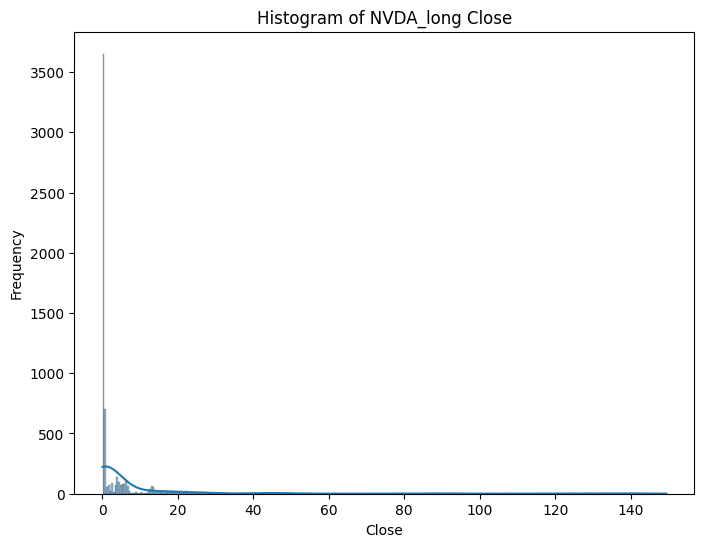

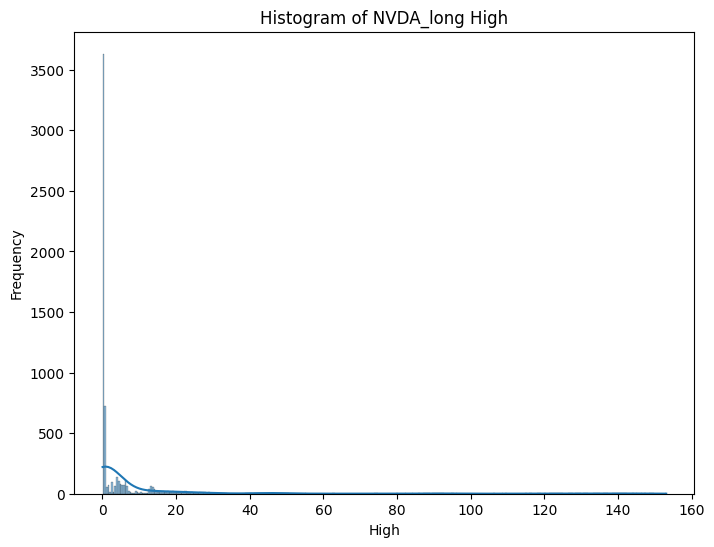

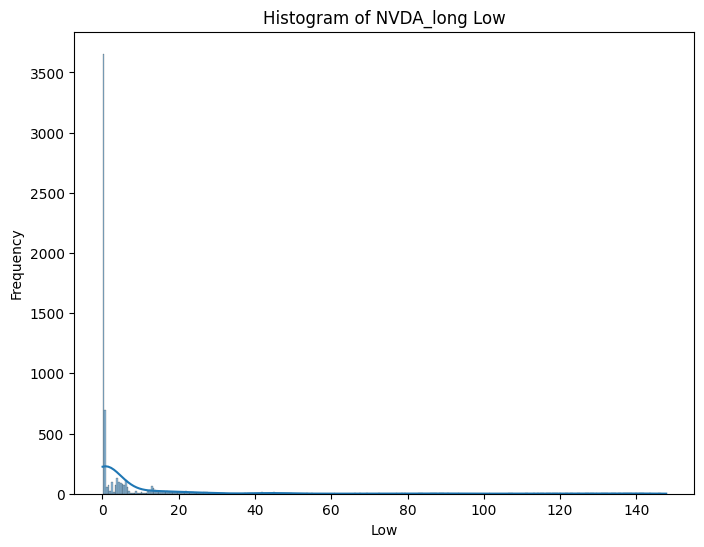

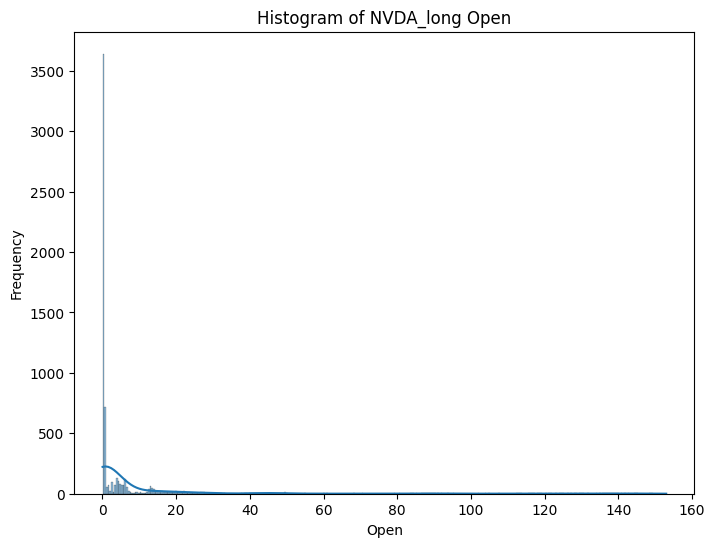

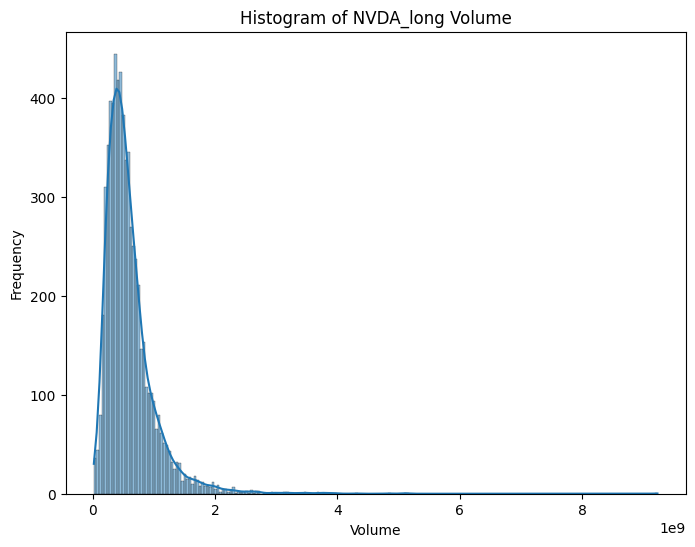

In [10]:
# Identify numerical columns
numerical_columns = nvda_long_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(nvda_long_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(nvda_long_data[column], kde=True)
        plt.title(f'Histogram of NVDA_long {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

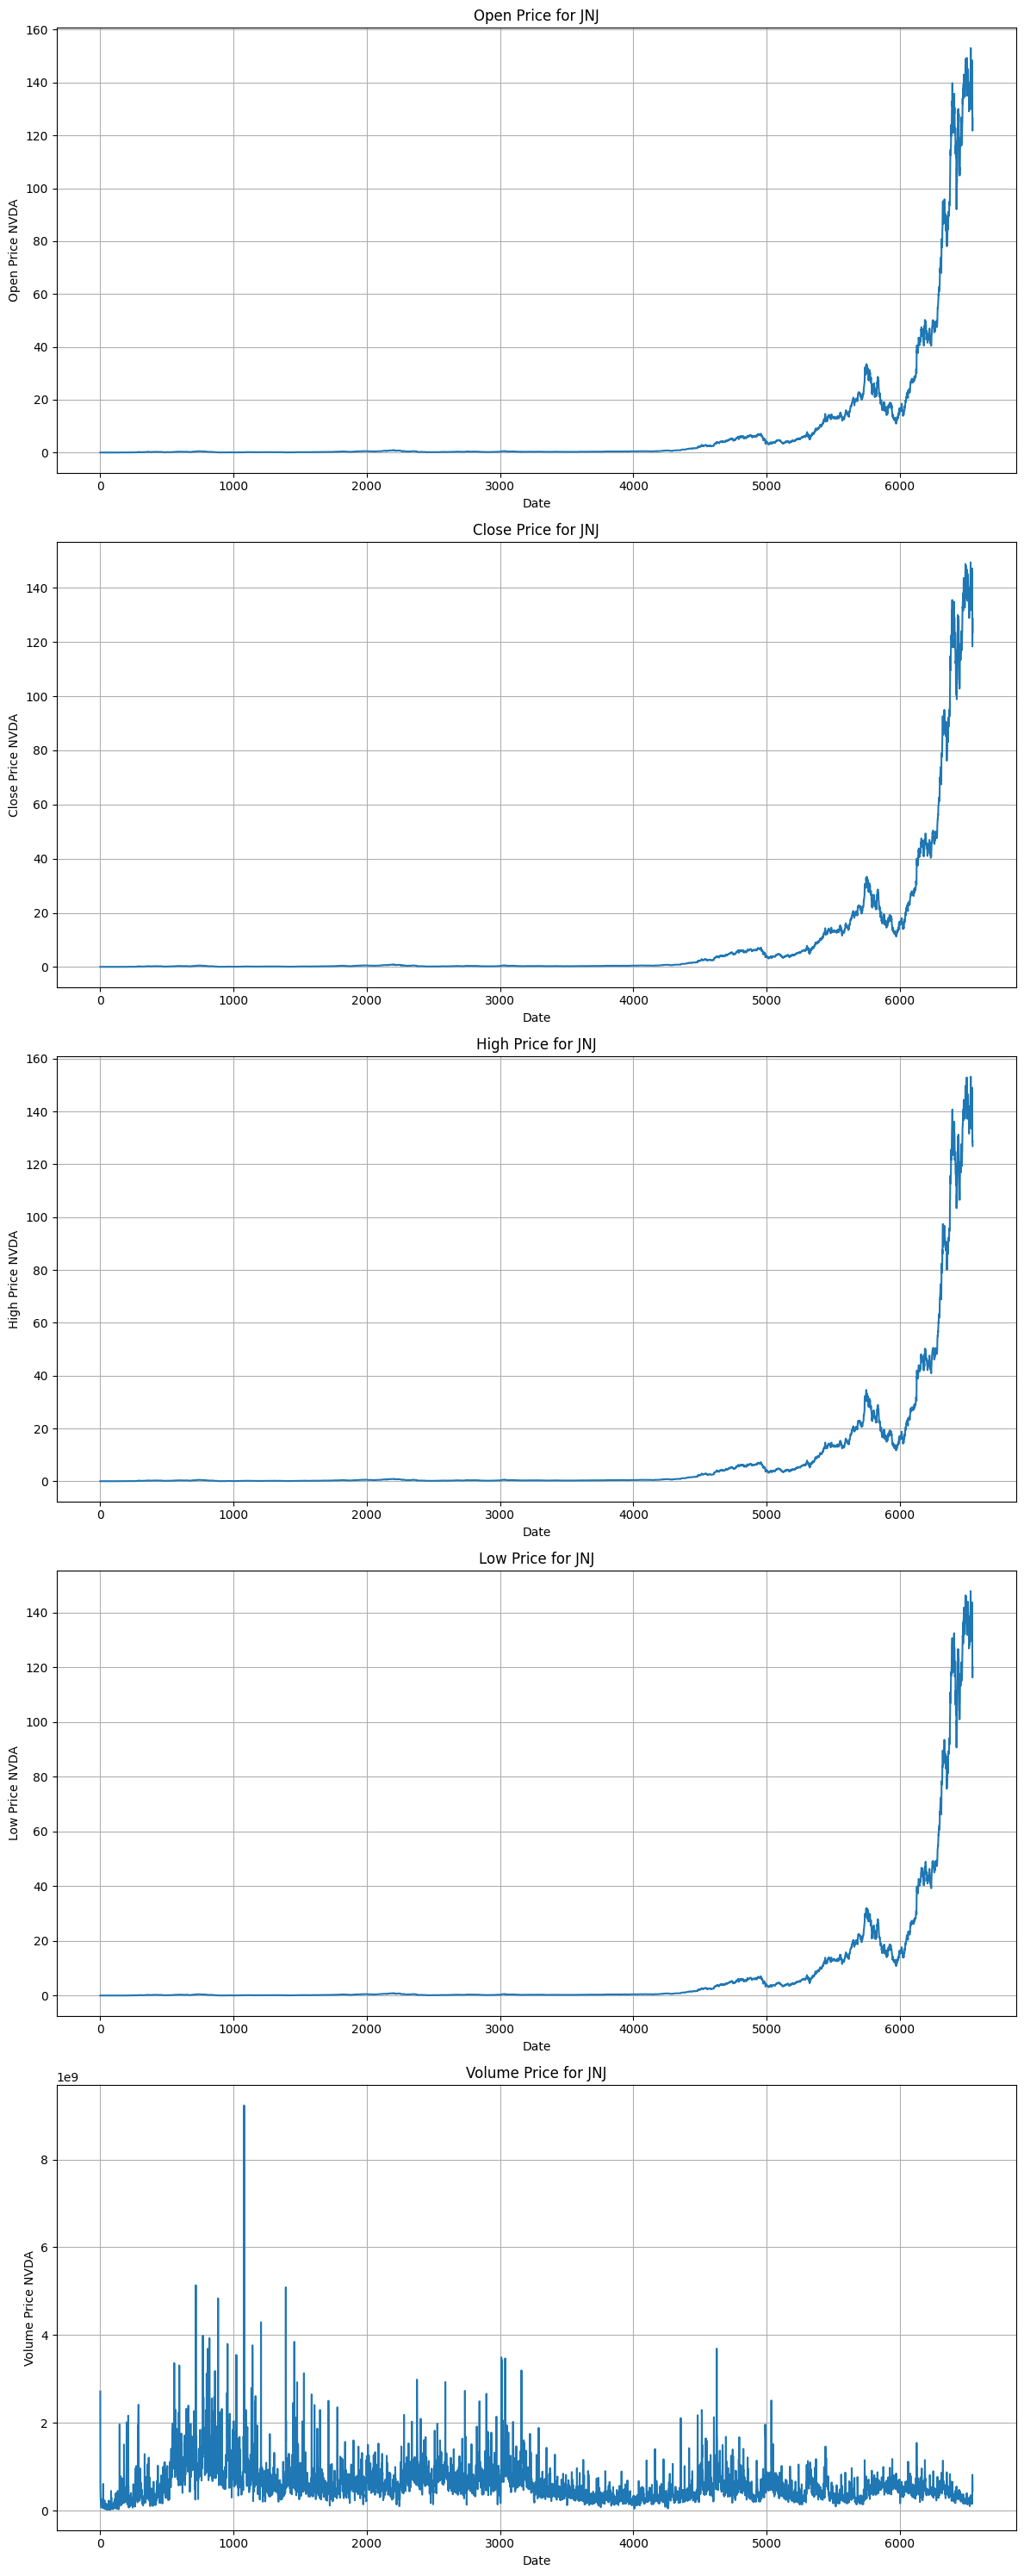

In [11]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(nvda_long_data.index, nvda_long_data[col])
    axes[i].set_title(f'{col} Price for JNJ')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price NVDA')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

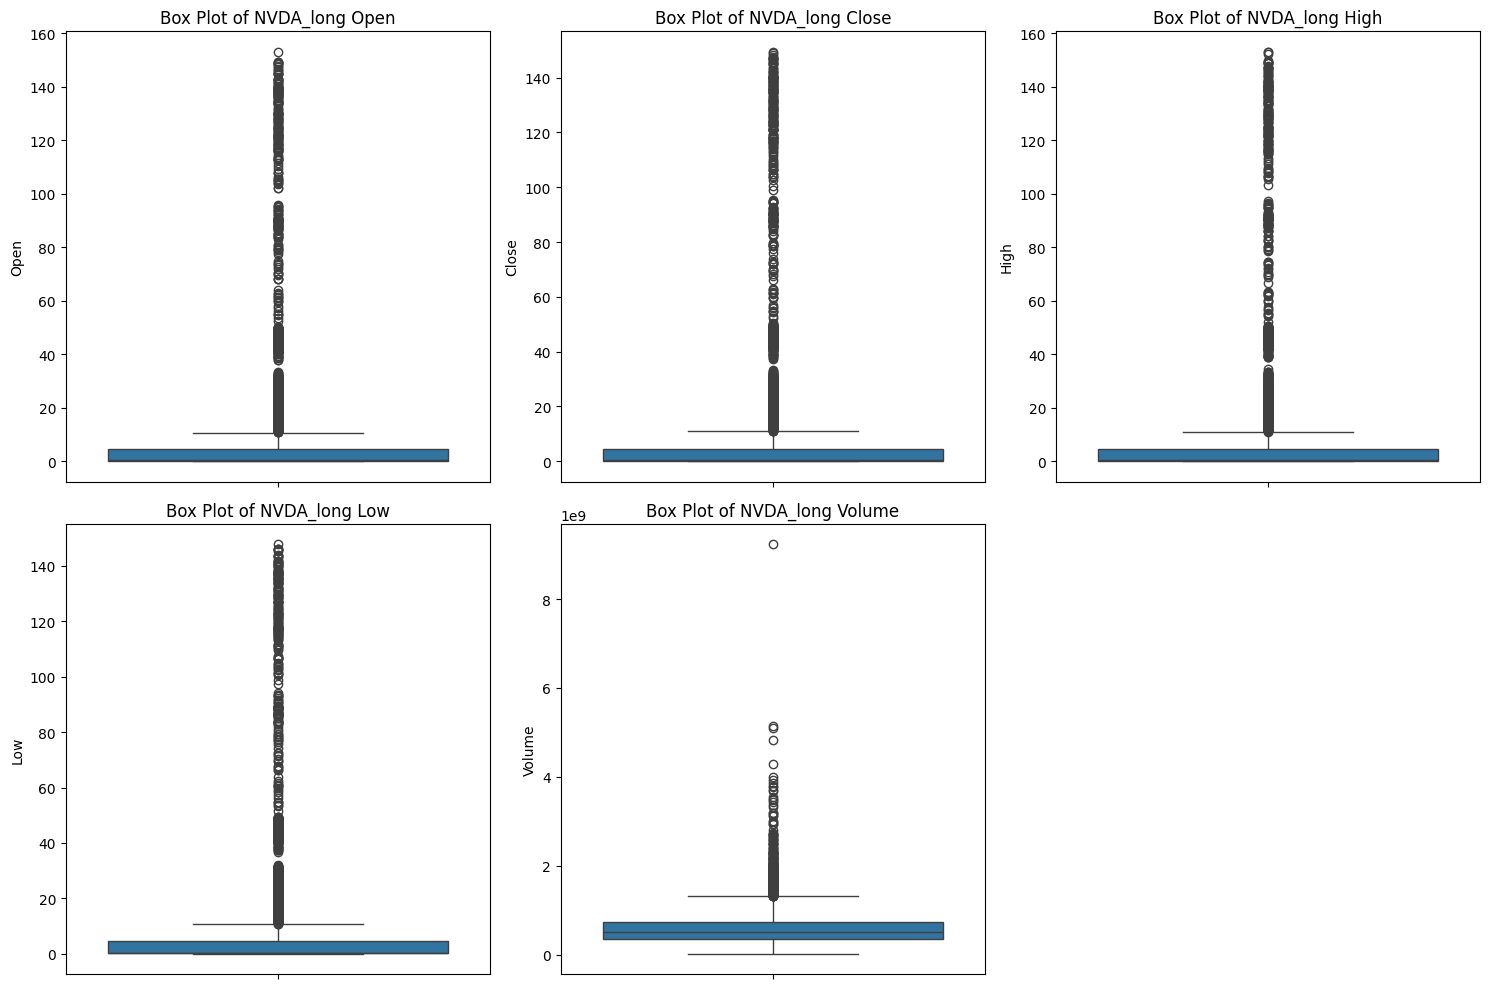

In [12]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=nvda_long_data[col])
    plt.title(f'Box Plot of NVDA_long {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

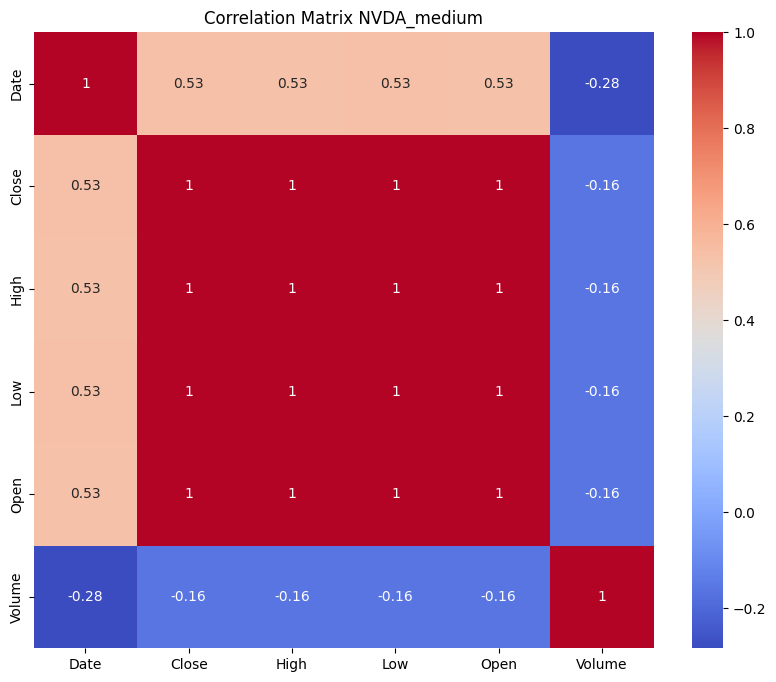

In [13]:
correlation_matrix = nvda_long_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix NVDA_medium')
plt.show()

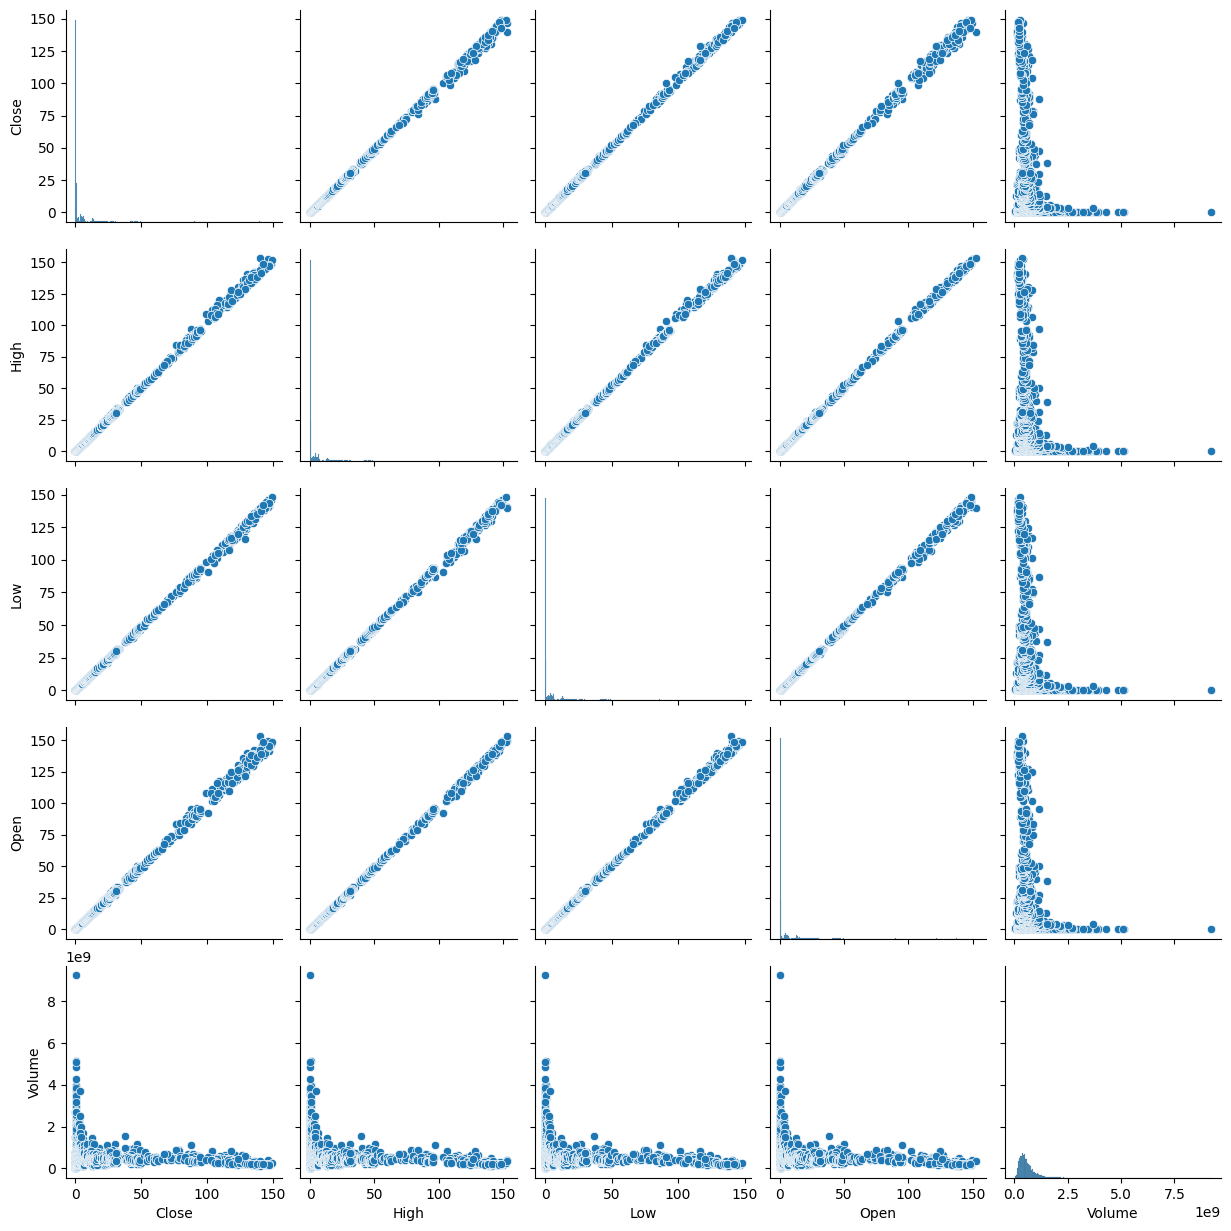

In [15]:
# pairs of numerical columns
sns.pairplot(nvda_long_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'NVDA_long Relationship between Close Price and Trading Volume')

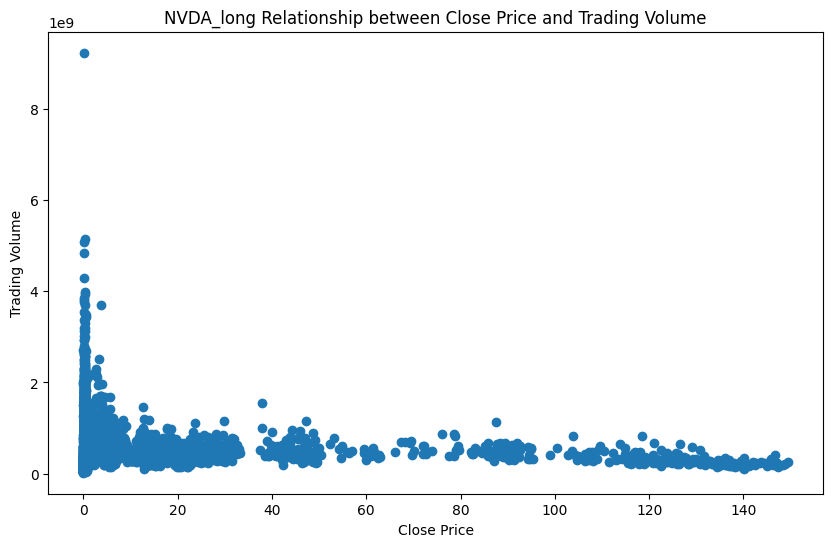

In [16]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(nvda_long_data['Close'], nvda_long_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('NVDA_long Relationship between Close Price and Trading Volume')

## Feature Engineering

In [17]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
nvda_long_data['SMA'] = nvda_long_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
nvda_long_data['StdDev'] = nvda_long_data['Close'].rolling(window=window_sma).std()
nvda_long_data['UpperBand'] = nvda_long_data['SMA'] + (2 * nvda_long_data['StdDev'])
nvda_long_data['LowerBand'] = nvda_long_data['SMA'] - (2 * nvda_long_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nvda_long_data['RSI'] = calculate_rsi(nvda_long_data)

In [18]:
nvda_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364
LowerBand,364


In [20]:
# FILL NA with mean
nvda_long_data.fillna(nvda_long_data.mean(), inplace=True)

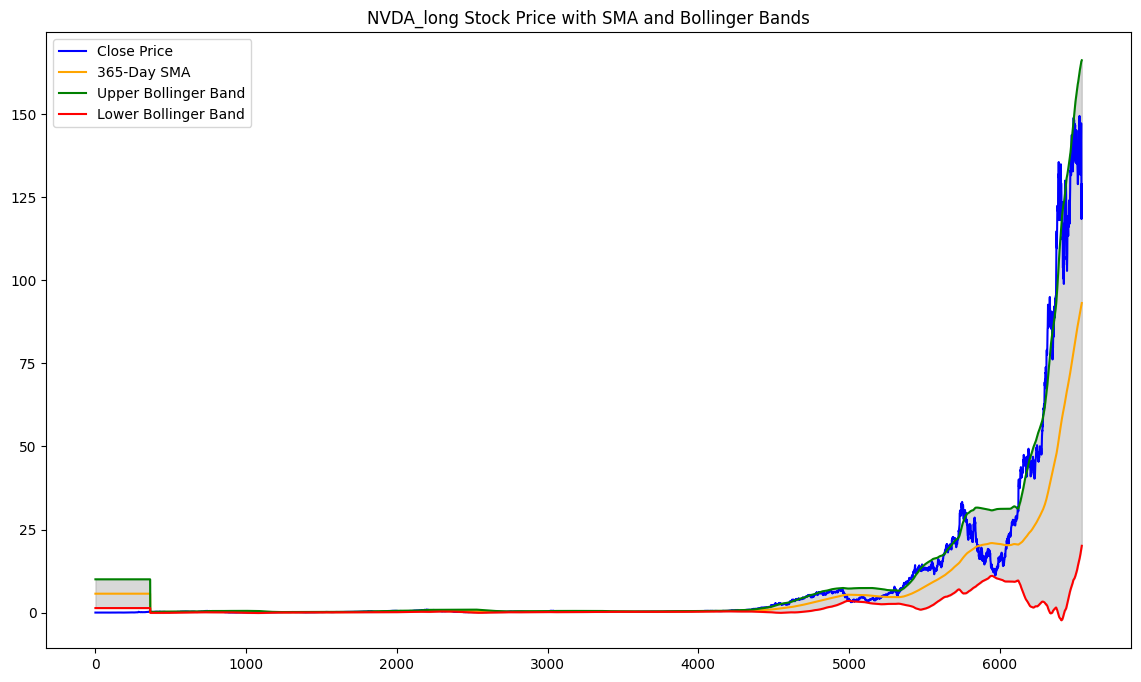

In [24]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(nvda_long_data['Close'], label='Close Price', color='blue')
plt.plot(nvda_long_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(nvda_long_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(nvda_long_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(nvda_long_data.index, nvda_long_data['UpperBand'], nvda_long_data['LowerBand'], color='gray', alpha=0.3)
plt.title('NVDA_long Stock Price with SMA and Bollinger Bands')
plt.legend()
plt.show()

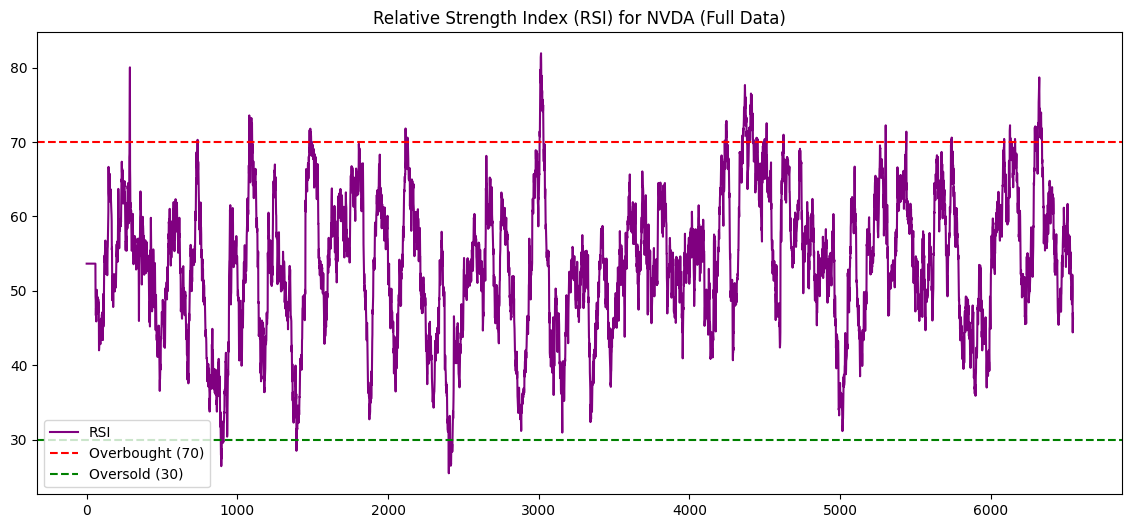

In [22]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nvda_long_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for NVDA_long')
plt.legend()
plt.show()

In [23]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.7 MB/s eta 0:00:00


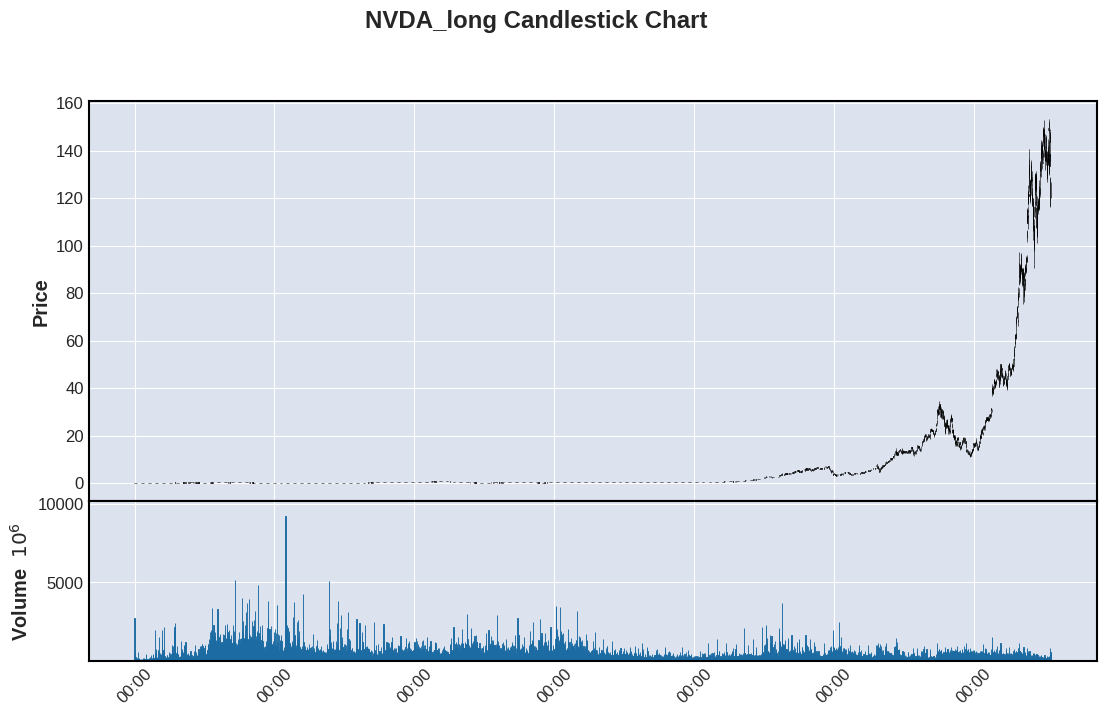

In [25]:
import mplfinance as mpf

# Ensure the index is a datetime object
nvda_long_data.index = pd.to_datetime(nvda_long_data.index)

# Plot candlestick chart
mpf.plot(nvda_long_data, type='candle', volume=True, figsize=(14, 8),
         title='NVDA_long Candlestick Chart')

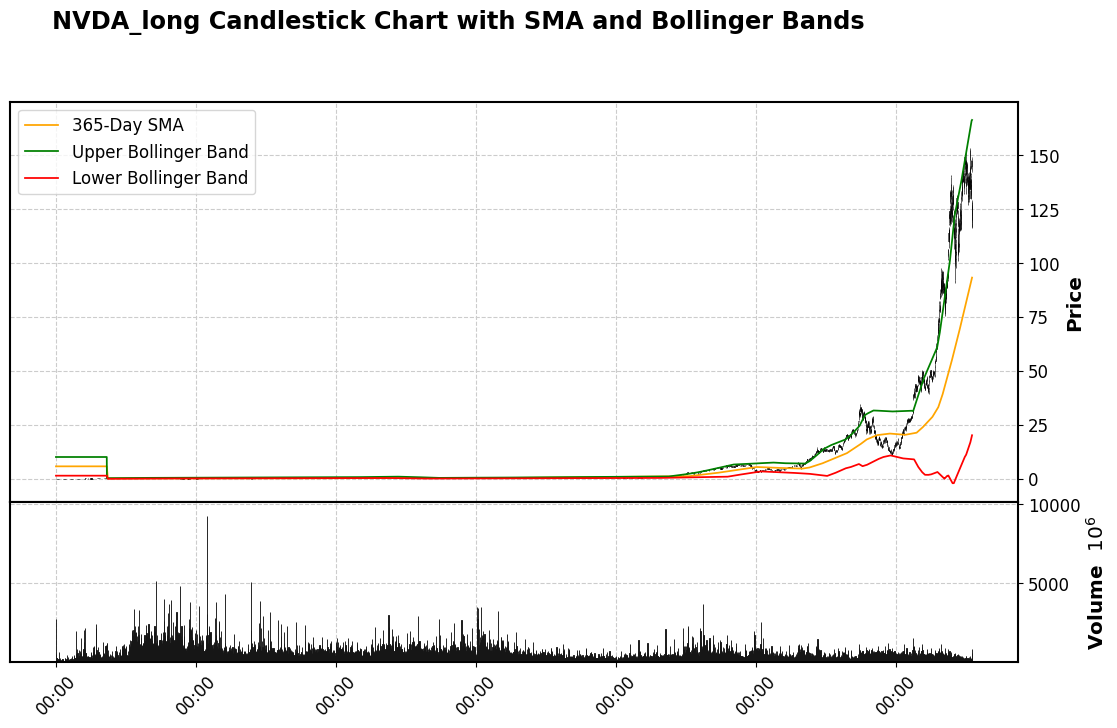

In [29]:
ap = [
    mpf.make_addplot(nvda_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(nvda_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(nvda_long_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    nvda_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='NVDA_long Candlestick Chart with SMA and Bollinger Bands',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

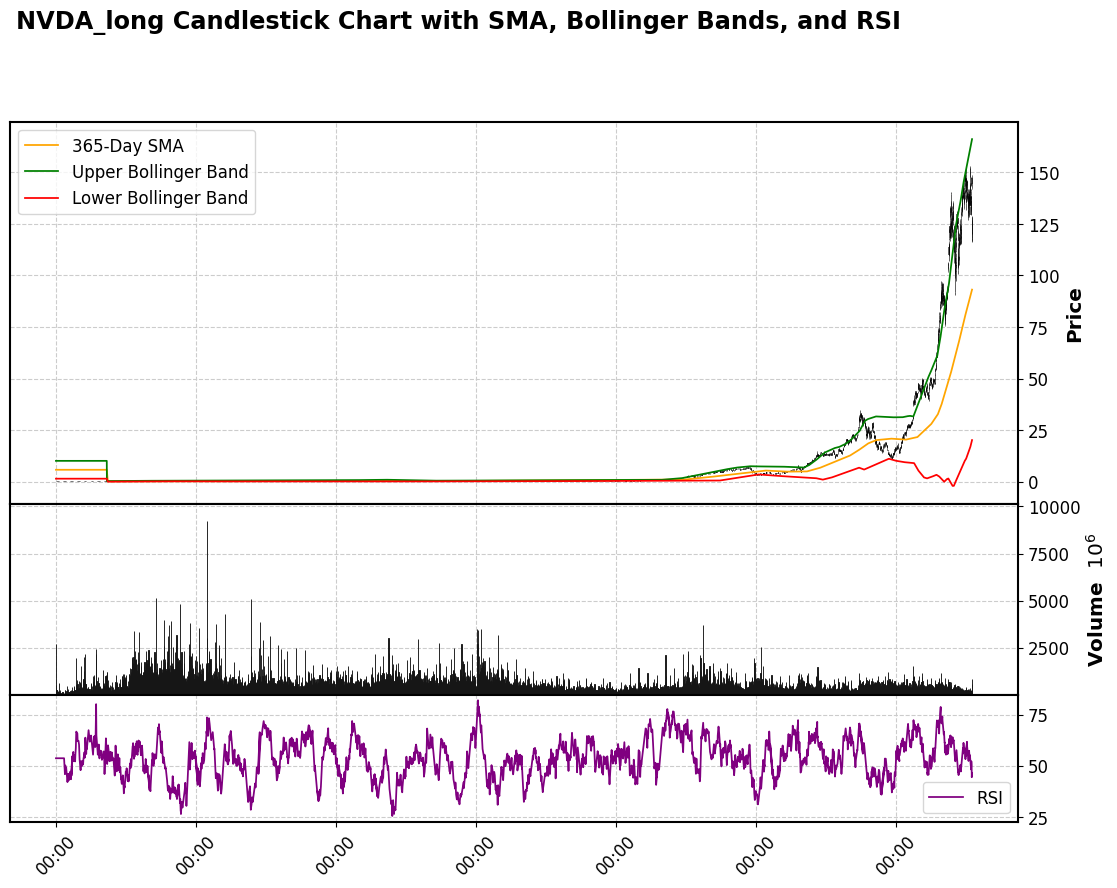

In [28]:
ap = [
    mpf.make_addplot(nvda_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(nvda_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(nvda_long_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(nvda_long_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    nvda_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='NVDA_long Candlestick Chart with SMA, Bollinger Bands, and RSI',
    style='classic',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

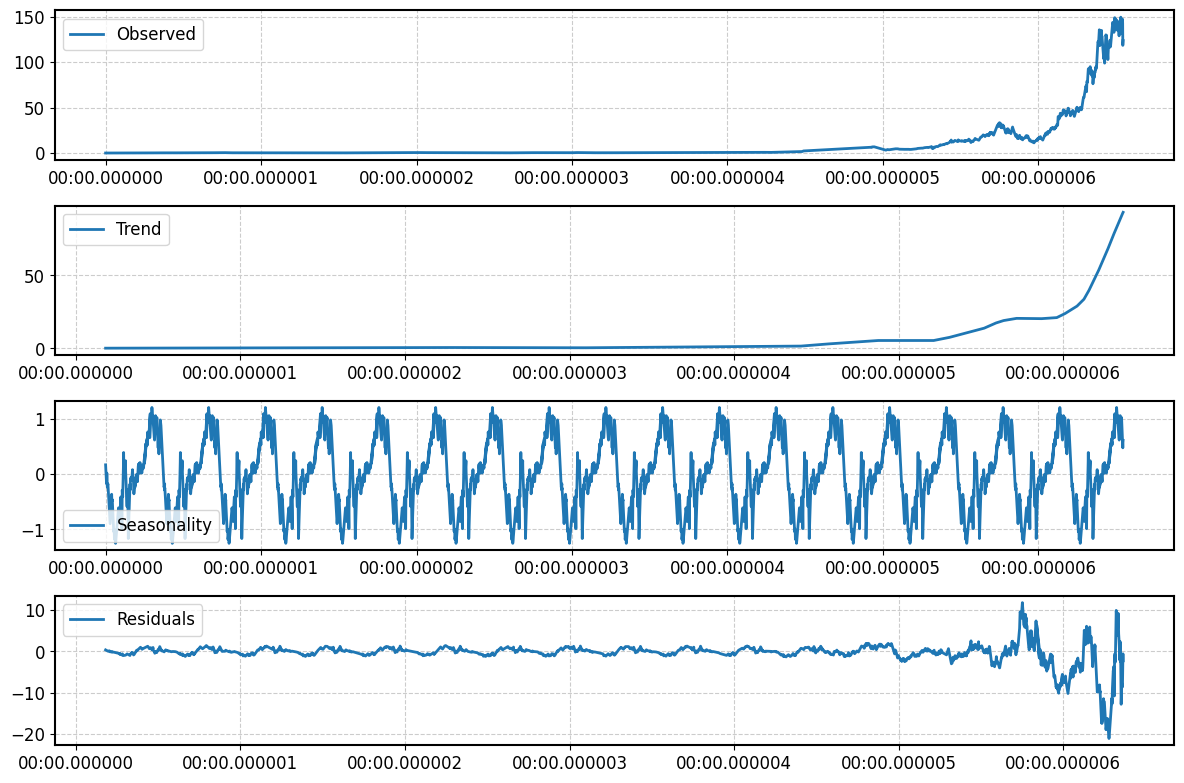

In [30]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(nvda_long_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 3.78%


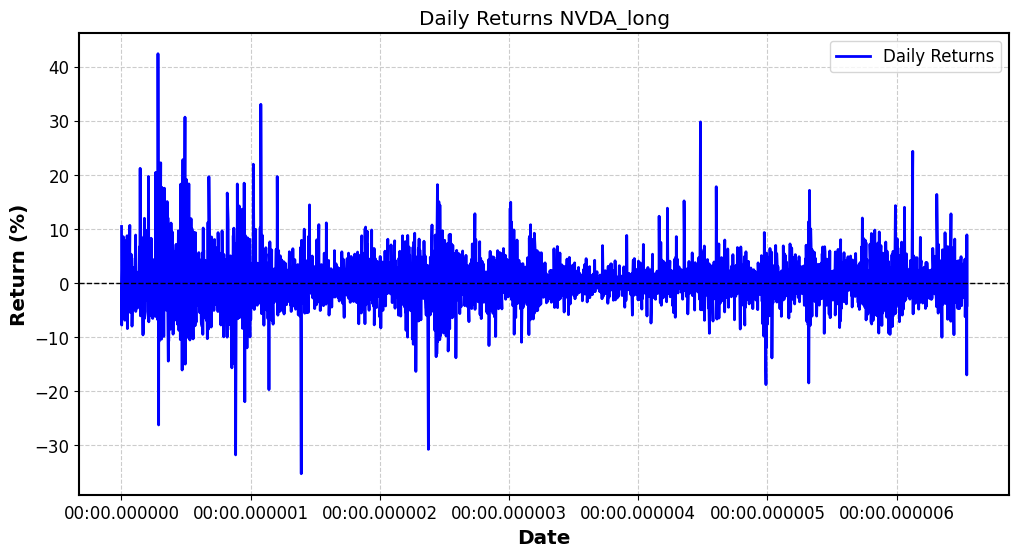

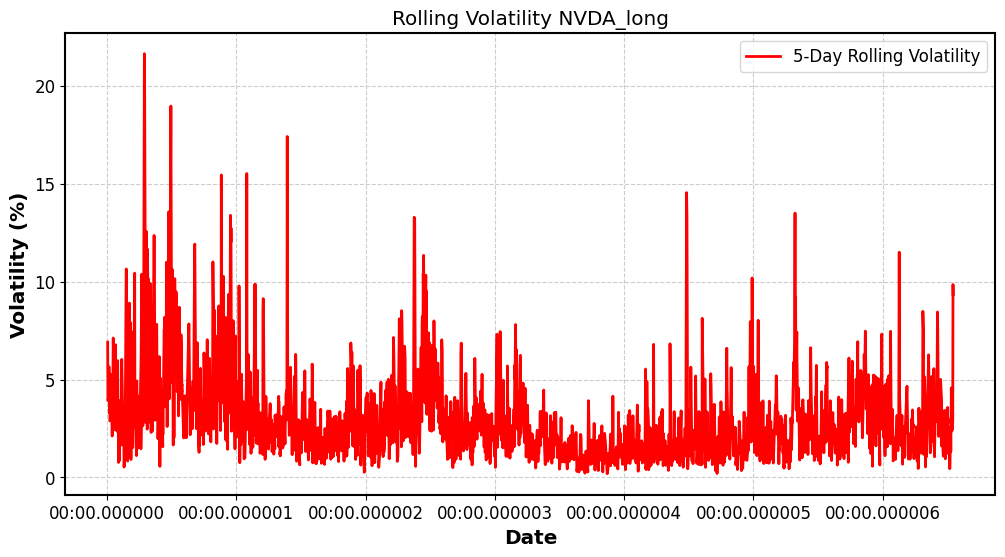

In [31]:
# Calculate daily returns
nvda_long_data['Daily_Return'] = nvda_long_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = nvda_long_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_long_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns NVDA_long')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
nvda_long_data['Rolling_Volatility'] = nvda_long_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(nvda_long_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility NVDA_long')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(nvda_long_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: 3.845846657457199
p-value: 1.0
Critical Values:
   1%: -3.431354897138083
   5%: -2.861984078545132
   10%: -2.5670063796451634
The data is non-stationary (fail to reject the null hypothesis).


In [33]:
# Apply differencing
nvda_long_data['Close_diff'] = nvda_long_data['Close'].diff().dropna()

In [34]:
nvda_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [35]:
# drop na
nvda_long_data.dropna(inplace=True)

In [36]:
# Recheck stationarity using ADF test
result = adfuller(nvda_long_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -13.149601521383124
p-value: 1.3756210557034844e-24
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

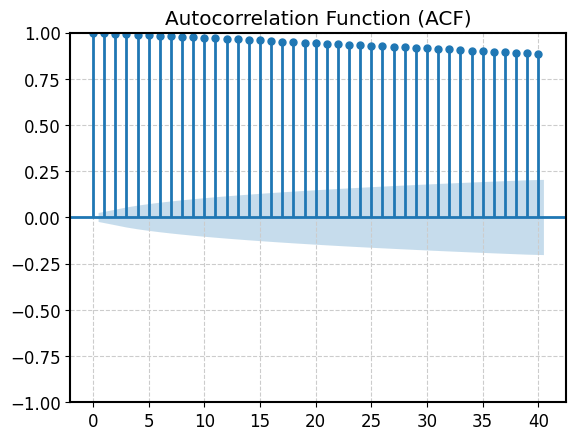

In [37]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_long_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

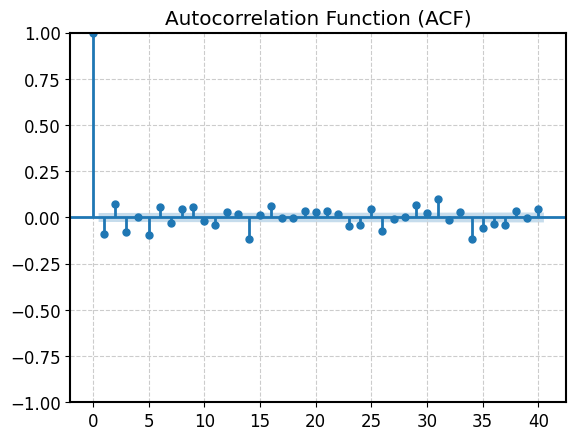

In [38]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_long_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
nvda_long_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
nvda_long_data = nvda_long_data[['Date', 'Close_diff']]

In [ ]:
nvda_long_data

,Date,Close_diff
0,2000-07-10,0.011464
1,2000-07-11,0.018867
2,2000-07-12,0.007164
3,2000-07-13,0.024361
4,2000-07-14,-0.002150
...,...,...
6172,2025-01-23,0.149994
6173,2025-01-24,-4.600006
6174,2025-01-27,-24.199997
6175,2025-01-28,10.570007


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(nvda_long_data) * 0.8)  # 80% for training
train_data = nvda_long_data[:train_size]
test_data = nvda_long_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [ ]:
train_data

Price,Close
Ticker,NVDA
Date,
1999-01-22,0.041016
1999-01-25,0.045313
1999-01-26,0.041797
1999-01-27,0.041667
1999-01-28,0.041536
...,...
2019-10-25,5.113500
2019-10-28,5.169750


In [ ]:
test_data

Price,Close
Ticker,NVDA
Date,
2019-11-01,5.064750
2019-11-04,5.262500
2019-11-05,5.240250
2019-11-06,5.190750
2019-11-07,5.208500
...,...
2025-01-08,140.110001
2025-01-10,135.910004


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2000-07-10 00:00:00'), Timestamp('2020-02-28 00:00:00'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2020-03-02 00:00:00'), Timestamp('2025-01-29 00:00:00'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.1175
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0015
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0015
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0014
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0017
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
43.62075924873352


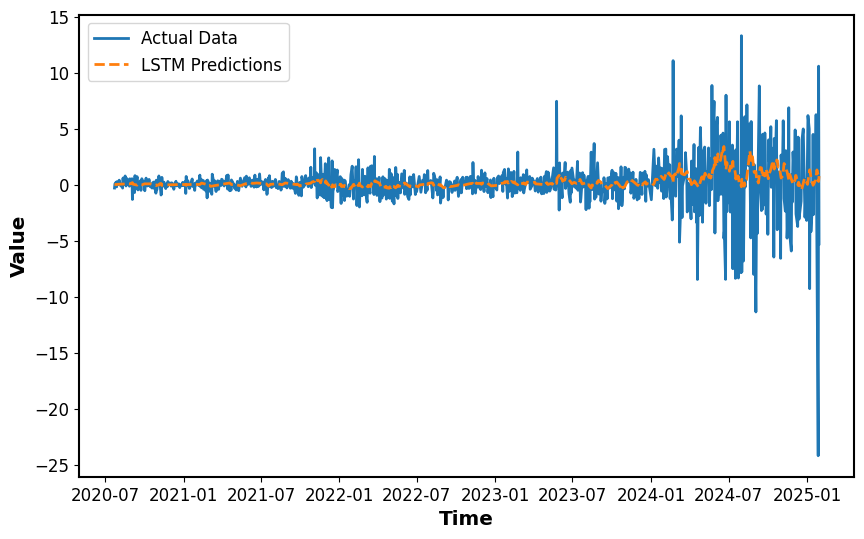

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

1137.1245898894426


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━

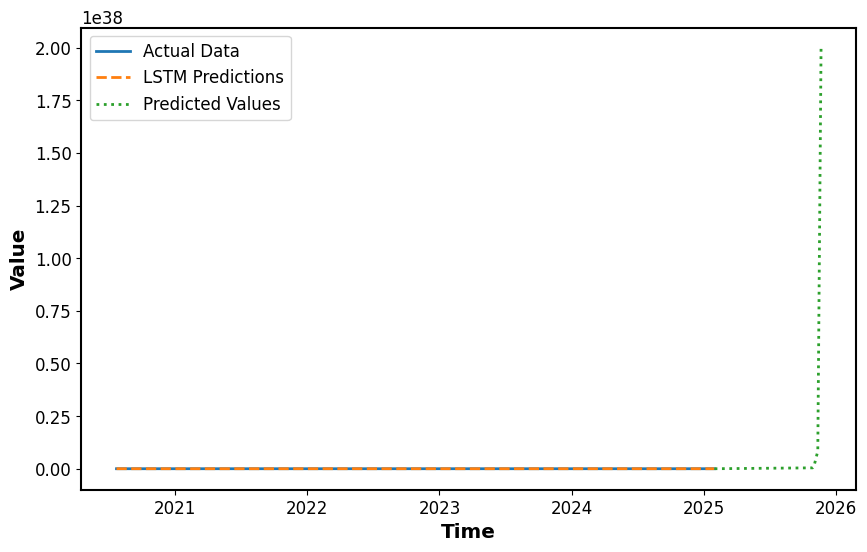

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()